# GraphCast Dataset

In [ ]:

# Map model choice to assets path
model2assets = {
    "fourcastnetv2-small":"./fcnv2",
    "panguweather":"./pw",
    "aurora-2.5-finetuned":"./au",
    "graphcast":"./gc",
    "graphcast-1p00":"./gc"
}

assets = model2assets[model]

# Runs the ai-models-gfs command
!ai-models-gfs \
    --input {input_data} \
    --date {date} \
    --time {time} \
    --assets {assets} \
    --path {output_path} \
    --lead {forecast_lead} \
    {model}


# ERA5 Dataset

In [ ]:
import xarray as xr
ds_fc = xr.open_dataset("/content/drive/MyDrive/Fmodel/merged_era5_6hourly_june2021.nc")

# Mean Sea Level Pressure

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import xarray as xr

# Helper function for plotting at a given time index
def plot_mslp_slider(t_index):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ERA5 interpolated
    msl_era5_interp.isel(valid_time=t_index).plot(ax=axs[0])
    axs[0].set_title(f"ERA5 MSLP")

    # GraphCast
    msl_gc.isel(time=t_index).plot(ax=axs[1])
    axs[1].set_title(f"GraphCast MSLP")

    plt.tight_layout()
    plt.show()

# Create interactive slider (assumes 6-hour intervals up to 240h)
interact(plot_mslp_slider, t_index=widgets.IntSlider(min=0, max=len(msl_gc.time)-1, step=1, value=0))


interactive(children=(IntSlider(value=0, description='t_index', max=40), Output()), _dom_classes=('widget-inte…

<function __main__.plot_mslp_slider(t_index)>

# Temperature

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import xarray as xr

# ✅ Ensure longitudes match (convert to 0–360 and sort)
ds_fc.coords['longitude'] = ds_fc.longitude % 360
ds_fc = ds_fc.sortby('longitude')

# ✅ Extract temperature at 500 hPa
if 500 in ds_fc['pressure_level']:
    t_era5 = ds_fc["t"].sel(pressure_level=500)
else:
    raise ValueError("ERA5 temperature does not contain level=500 hPa")

if 500 in ds_gc['level']:
    t_gc = ds_gc["t"].sel(level=500)
else:
    raise ValueError("GraphCast temperature does not contain level=500 hPa")

# ✅ Interpolate ERA5 to GraphCast grid
t_era5_interp = t_era5.interp(
    latitude=t_gc.latitude,
    longitude=t_gc.longitude,
    method="linear"
)

# ✅ Rename time axis if needed
if "valid_time" in t_era5_interp.dims:
    t_era5_interp = t_era5_interp.rename({"valid_time": "time"})

# ✅ Interactive plot function
def plot_temperature_500hpa(t_index):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ERA5
    t_era5_interp.isel(time=t_index).plot(ax=axs[0], cmap="coolwarm")
    axs[0].set_title(f"ERA5 Temperature @500 hPa")

    # GraphCast
    t_gc.isel(time=t_index).plot(ax=axs[1], cmap="coolwarm")
    axs[1].set_title(f"GraphCast Temperature @500 hPa")

    plt.tight_layout()
    plt.show()

# ✅ Create interactive slider
interact(
    plot_temperature_500hpa,
    t_index=widgets.IntSlider(min=0, max=len(t_gc.time)-1, step=1, value=0)
)


interactive(children=(IntSlider(value=0, description='t_index', max=40), Output()), _dom_classes=('widget-inte…

<function __main__.plot_temperature_500hpa(t_index)>

# U-Wind

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import xarray as xr

# Ensure longitudes match between datasets
ds_fc.coords['longitude'] = ds_fc.longitude % 360
ds_fc = ds_fc.sortby('longitude')

# 🔹 Extract U component from ERA5 and GraphCast
# Replace 'level' with your dataset's level dim if needed (e.g., isobaricInhPa)

# --- ERA5 ---
if 500 in ds_fc['pressure_level']:
    u_era5 = ds_fc["u"].sel(pressure_level=500)
else:
    raise ValueError("500 hPa level not found in ERA5 dataset")

# --- GraphCast ---
if 500 in ds_gc['level']:
    u_gc = ds_gc["u"].sel(level=500)
else:
    raise ValueError("500 hPa level not found in GraphCast dataset")

# 🔹 Interpolate ERA5 to GraphCast grid
u_era5_interp = u_era5.interp(
    latitude=u_gc.latitude,
    longitude=u_gc.longitude,
    method="linear"
)

# Rename time axis if needed
if "valid_time" in u_era5_interp.dims:
    u_era5_interp = u_era5_interp.rename({"valid_time": "time"})

# ✅ Interactive plotting function
def plot_u_500_slider(t_index):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ERA5
    u_era5_interp.isel(time=t_index).plot(ax=axs[0], cmap="coolwarm")
    axs[0].set_title(f"ERA5 U @500 hPa")

    # GraphCast
    u_gc.isel(time=t_index).plot(ax=axs[1], cmap="coolwarm")
    axs[1].set_title(f"GraphCast U @500")

    plt.tight_layout()
    plt.show()

# Slider for time steps
interact(
    plot_u_500_slider,
    t_index=widgets.IntSlider(min=0, max=len(u_gc.time)-1, step=1, value=0)
)


interactive(children=(IntSlider(value=0, description='t_index', max=40), Output()), _dom_classes=('widget-inte…

<function __main__.plot_u_500_slider(t_index)>

# V-Wind

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import xarray as xr

# ✅ Fix longitudes to 0–360 and sort
ds_fc.coords['longitude'] = ds_fc.longitude % 360
ds_fc = ds_fc.sortby('longitude')

# ✅ Select v wind at 500 hPa
if 500 in ds_fc['pressure_level']:
    v_era5 = ds_fc["v"].sel(pressure_level=500)
else:
    raise ValueError("ERA5 v-wind does not contain level=500 hPa")

if 500 in ds_gc['level']:
    v_gc = ds_gc["v"].sel(level=500)
else:
    raise ValueError("GraphCast v-wind does not contain level=500 hPa")

# ✅ Interpolate ERA5 v-wind to GraphCast grid
v_era5_interp = v_era5.interp(
    latitude=v_gc.latitude,
    longitude=v_gc.longitude,
    method="linear"
)

# ✅ Rename time axis if needed
if "valid_time" in v_era5_interp.dims:
    v_era5_interp = v_era5_interp.rename({"valid_time": "time"})

# ✅ Interactive plotting function
def plot_vwind_500hpa(t_index):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # ERA5
    v_era5_interp.isel(time=t_index).plot(ax=axs[0], cmap="bwr")
    axs[0].set_title(f"ERA5 v-wind @500 hPa (t+{t_index*6}h)")

    # GraphCast
    v_gc.isel(time=t_index).plot(ax=axs[1], cmap="bwr")
    axs[1].set_title(f"GraphCast v-wind @500 hPa (t+{t_index*6}h)")

    plt.tight_layout()
    plt.show()

# ✅ Create interactive slider
interact(
    plot_vwind_500hpa,
    t_index=widgets.IntSlider(min=0, max=len(v_gc.time)-1, step=1, value=0)
)


interactive(children=(IntSlider(value=0, description='t_index', max=40), Output()), _dom_classes=('widget-inte…

<function __main__.plot_vwind_500hpa(t_index)>

# RMSE Results

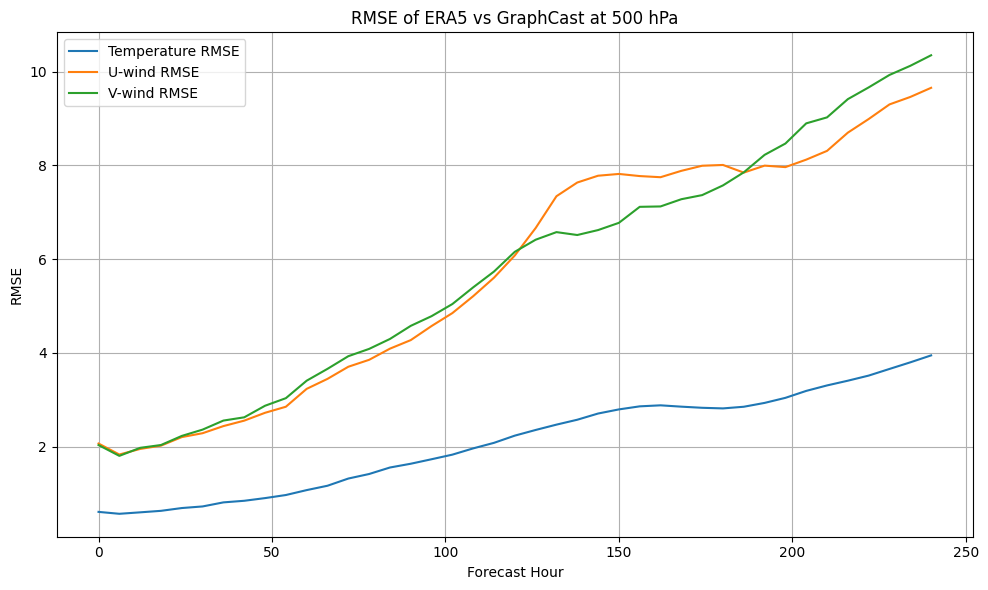

In [ ]:
import matplotlib.pyplot as plt

# Convert forecast steps to hours (assuming 6-hour steps)
hours = np.arange(0, len(rmse_t)) * 6

plt.figure(figsize=(10, 6))
plt.plot(hours, rmse_t, label="Temperature RMSE")
plt.plot(hours, rmse_u, label="U-wind RMSE")
plt.plot(hours, rmse_v, label="V-wind RMSE")

plt.xlabel("Forecast Hour")
plt.ylabel("RMSE")
plt.title("RMSE of ERA5 vs GraphCast at 500 hPa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
